In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from model import Network
network = Network()

In [2]:
# Define some training data
numDataPoints = 100
npVals = np.random.uniform(-10, 10, numDataPoints)
vals = torch.from_numpy(npVals).float()
truth = vals + 1
data = torch.utils.data.TensorDataset(vals, truth)

In [3]:
# Define parameters
epochs = 10
lossFunction = torch.nn.MSELoss()
optimiser = torch.optim.Adam(network.parameters(), lr = 0.01)

In [4]:
# Arrays to hold data
testArr = np.arange(-20, 20.01, 1)
testTensor = torch.from_numpy(testArr).float()
testTruth = testTensor + 1
testData = torch.utils.data.TensorDataset(testTensor, testTruth)
testLoader = torch.utils.data.DataLoader(testData)
out = []

# Define training loop
trainLoader = torch.utils.data.DataLoader(data)

for epoch in range(1, epochs + 1):
    totalLoss = 0

    for batch in trainLoader:
        
        tInput, tOutput = batch
        #print(tInput)
        prediction = network(tInput)
        loss = lossFunction(prediction, tOutput)
        optimiser.zero_grad()
        loss.backward()
        optimiser.step()

        totalLoss += loss.item()
    
    # At the end of each epoch, create test results
    result = []
    for d in testLoader:
        r, a = d
        #print(r)
        ans = network(r).item()
        result.append(ans)
    result = np.array(result)
    out.append((epoch, result))


    print(f"Epoch {epoch}: {totalLoss}")

Epoch 1: 1978.5235116521362
Epoch 2: 326.9255204379733
Epoch 3: 65.4385305326432
Epoch 4: 24.12600302696228
Epoch 5: 9.45033435150981
Epoch 6: 3.280912742950022
Epoch 7: 0.9908023104071617
Epoch 8: 0.25927771447459236
Epoch 9: 0.05860888482129667
Epoch 10: 0.011396540667192312


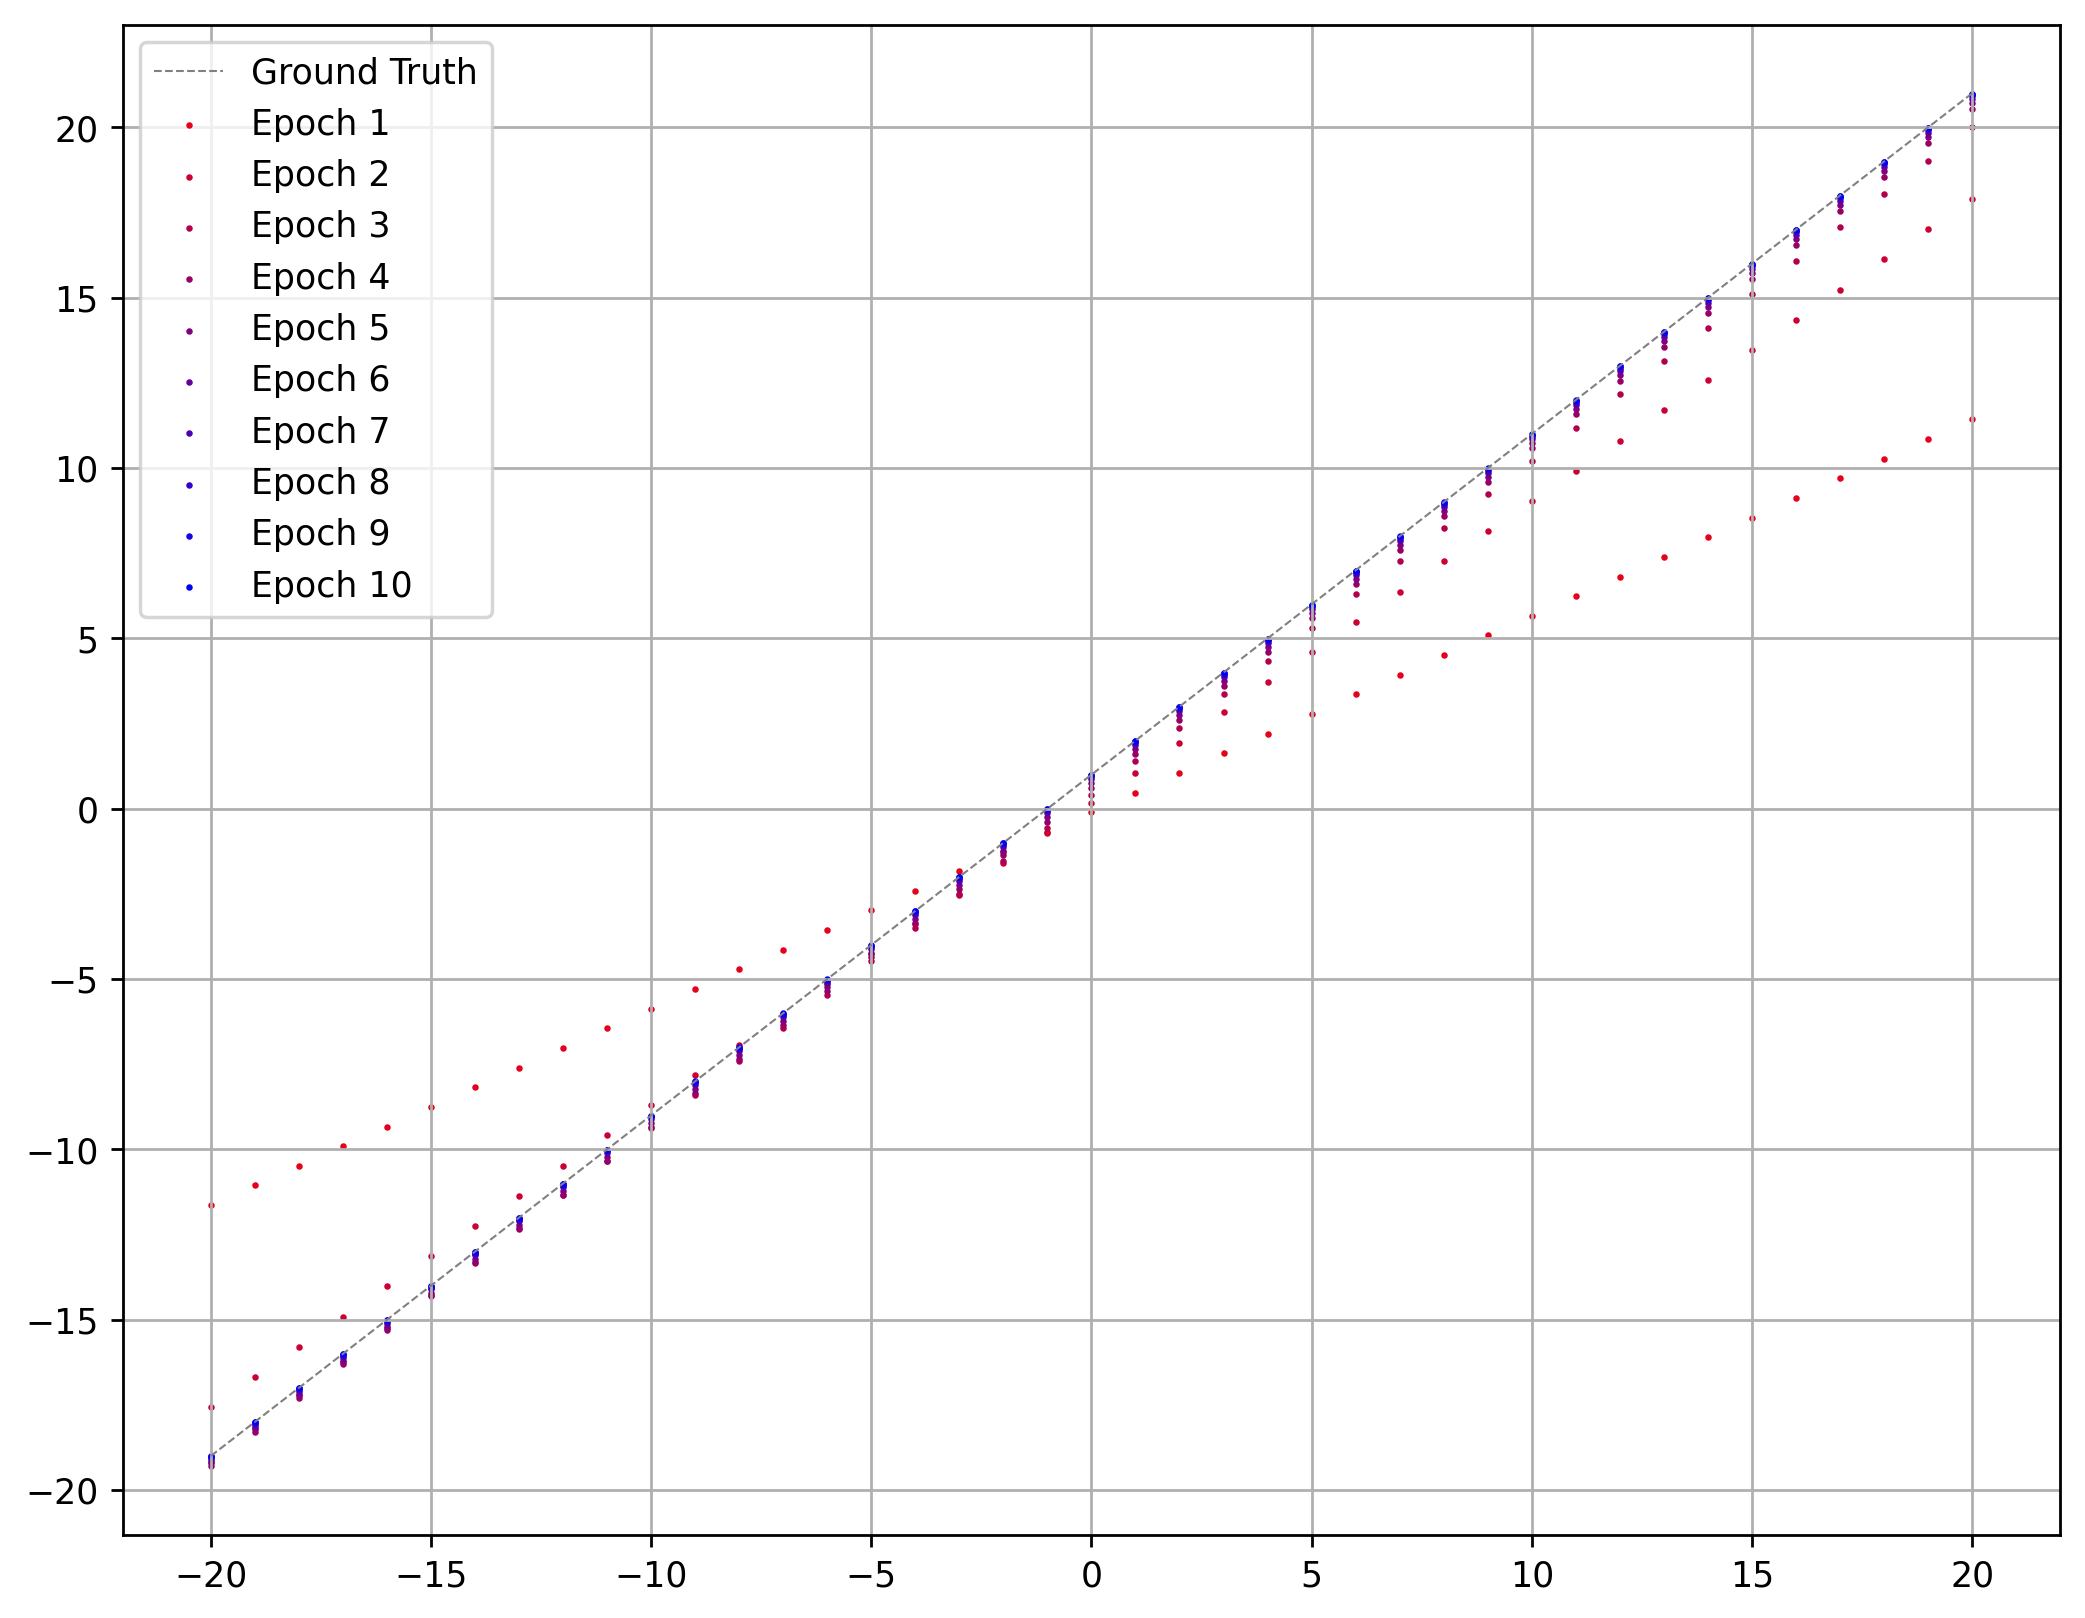

In [5]:
plt.figure(figsize = (10, 8), dpi = 250)
plt.plot([-20, 20], [-19, 21], c = "gray", linewidth = 0.6, linestyle = "dashed", label = "Ground Truth")
for (ep, res) in out:
    plt.scatter(testArr, res, label = f"Epoch {ep}", marker = ".", s = 3, color = (1 - ep/10, 0, ep/10))
plt.grid()
plt.legend()
plt.show()